## Benchmarking based on single feature, using frequency based ranking

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from collections import defaultdict
from IPython.display import display

# Load the CSV file (whitespace-delimited)
csv_path = "C:\\Users\\aditi\\Downloads\\dbmopp_dataset_perf.csv"
df = pd.read_csv(csv_path, sep='\s+')

# Features to analyze
features = ['n_var', 'n_obj', 'nonident_ps', 'var_density', 'n_discon_ps', 'n_local_fronts', 'n_resist_regions']


# Budgets to analyze
budgets = [5000, 10000, 30000, 50000]

# Parameters
n_iterations = 1000
noise_std = 1e-4

# Store all results
all_feature_results = []

# Loop over each budget level
for budget_level in budgets:
    df_budget = df[df['budget'] == budget_level]

    print(f"\n Analyzing budget = {budget_level}...\n")

# Store results
all_feature_results = []

# Loop over each feature
for feature in features:
    # Define median split groups
    median_val = df[feature].median()
    df['feature_group'] = np.where(df[feature] <= median_val, f'Low {feature}', f'High {feature}')

    for group_name, group_df in df.groupby('feature_group'):
        if len(group_df) < 10:
            continue  # skip if too small

        algo_rank_counts = defaultdict(lambda: [0] * 4)

        for _ in range(n_iterations):
            sample = resample(group_df, replace=True, n_samples=len(group_df))
            sample = sample.copy()
            sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
            mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
            ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
            for i, row in ranked.iterrows():
                algo_rank_counts[row['algo']][i] += 1

        # Format results
        algorithms = sorted(algo_rank_counts.keys())
        result = {
            'Feature': [feature] * len(algorithms),
            'Group': [group_name] * len(algorithms),
            'Algorithm': algorithms
        }
        for rank in range(4):
            result[f'Rank {rank+1} Frequency'] = [
                algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
            ]

        all_feature_results.append(pd.DataFrame(result))

# Combine all feature benchmarking results and clean up
final_df = pd.concat(all_feature_results, ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Group by feature and feature group, and display results
for feature in sorted(final_df['Feature'].unique()):
    for group in sorted(final_df[final_df['Feature'] == feature]['Group'].unique()):
        print(f"\n Results for Feature = {feature}, Group = {group}")
        display(final_df[(final_df['Feature'] == feature) & (final_df['Group'] == group)])


 Analyzing budget = 5000...


 Analyzing budget = 10000...


 Analyzing budget = 30000...


 Analyzing budget = 50000...


 Results for Feature = n_discon_ps, Group = High n_discon_ps


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
28,n_discon_ps,High n_discon_ps,IBEA,1.0,0.0,0.0,0.0
29,n_discon_ps,High n_discon_ps,MOEAD,0.0,0.0,1.0,0.0
30,n_discon_ps,High n_discon_ps,NSGAII,0.0,1.0,0.0,0.0
31,n_discon_ps,High n_discon_ps,Random,0.0,0.0,0.0,1.0



 Results for Feature = n_discon_ps, Group = Low n_discon_ps


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
32,n_discon_ps,Low n_discon_ps,IBEA,1.0,0.0,0.000,0.000
33,n_discon_ps,Low n_discon_ps,MOEAD,0.0,0.0,0.949,0.051
34,n_discon_ps,Low n_discon_ps,NSGAII,0.0,1.0,0.000,0.000
35,n_discon_ps,Low n_discon_ps,Random,0.0,0.0,0.051,0.949



 Results for Feature = n_local_fronts, Group = High n_local_fronts


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
36,n_local_fronts,High n_local_fronts,IBEA,1.0,0.0,0.0,0.0
37,n_local_fronts,High n_local_fronts,MOEAD,0.0,0.0,0.0,1.0
38,n_local_fronts,High n_local_fronts,NSGAII,0.0,1.0,0.0,0.0
39,n_local_fronts,High n_local_fronts,Random,0.0,0.0,1.0,0.0



 Results for Feature = n_local_fronts, Group = Low n_local_fronts


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
40,n_local_fronts,Low n_local_fronts,IBEA,1.0,0.0,0.0,0.0
41,n_local_fronts,Low n_local_fronts,MOEAD,0.0,0.0,1.0,0.0
42,n_local_fronts,Low n_local_fronts,NSGAII,0.0,1.0,0.0,0.0
43,n_local_fronts,Low n_local_fronts,Random,0.0,0.0,0.0,1.0



 Results for Feature = n_obj, Group = High n_obj


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
8,n_obj,High n_obj,IBEA,1.0,0.0,0.000,0.000
9,n_obj,High n_obj,MOEAD,0.0,0.0,0.085,0.915
10,n_obj,High n_obj,NSGAII,0.0,1.0,0.000,0.000
11,n_obj,High n_obj,Random,0.0,0.0,0.915,0.085



 Results for Feature = n_obj, Group = Low n_obj


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
12,n_obj,Low n_obj,IBEA,1.0,0.0,0.0,0.0
13,n_obj,Low n_obj,MOEAD,0.0,0.0,1.0,0.0
14,n_obj,Low n_obj,NSGAII,0.0,1.0,0.0,0.0
15,n_obj,Low n_obj,Random,0.0,0.0,0.0,1.0



 Results for Feature = n_resist_regions, Group = High n_resist_regions


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
44,n_resist_regions,High n_resist_regions,IBEA,1.0,0.0,0.0,0.0
45,n_resist_regions,High n_resist_regions,MOEAD,0.0,0.0,1.0,0.0
46,n_resist_regions,High n_resist_regions,NSGAII,0.0,1.0,0.0,0.0
47,n_resist_regions,High n_resist_regions,Random,0.0,0.0,0.0,1.0



 Results for Feature = n_resist_regions, Group = Low n_resist_regions


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
48,n_resist_regions,Low n_resist_regions,IBEA,1.0,0.0,0.0,0.0
49,n_resist_regions,Low n_resist_regions,MOEAD,0.0,0.0,0.2,0.8
50,n_resist_regions,Low n_resist_regions,NSGAII,0.0,1.0,0.0,0.0
51,n_resist_regions,Low n_resist_regions,Random,0.0,0.0,0.8,0.2



 Results for Feature = n_var, Group = High n_var


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
0,n_var,High n_var,IBEA,1.0,0.0,0.0,0.0
1,n_var,High n_var,MOEAD,0.0,0.0,1.0,0.0
2,n_var,High n_var,NSGAII,0.0,1.0,0.0,0.0
3,n_var,High n_var,Random,0.0,0.0,0.0,1.0



 Results for Feature = n_var, Group = Low n_var


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
4,n_var,Low n_var,IBEA,1.0,0.0,0.0,0.0
5,n_var,Low n_var,MOEAD,0.0,0.0,0.0,1.0
6,n_var,Low n_var,NSGAII,0.0,1.0,0.0,0.0
7,n_var,Low n_var,Random,0.0,0.0,1.0,0.0



 Results for Feature = nonident_ps, Group = High nonident_ps


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
16,nonident_ps,High nonident_ps,IBEA,1.0,0.0,0.0,0.0
17,nonident_ps,High nonident_ps,MOEAD,0.0,0.0,1.0,0.0
18,nonident_ps,High nonident_ps,NSGAII,0.0,1.0,0.0,0.0
19,nonident_ps,High nonident_ps,Random,0.0,0.0,0.0,1.0



 Results for Feature = nonident_ps, Group = Low nonident_ps


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
20,nonident_ps,Low nonident_ps,IBEA,1.0,0.0,0.0,0.0
21,nonident_ps,Low nonident_ps,MOEAD,0.0,0.0,1.0,0.0
22,nonident_ps,Low nonident_ps,NSGAII,0.0,1.0,0.0,0.0
23,nonident_ps,Low nonident_ps,Random,0.0,0.0,0.0,1.0



 Results for Feature = var_density, Group = Low var_density


,Feature,Group,Algorithm,Rank 1 Frequency,Rank 2 Frequency,Rank 3 Frequency,Rank 4 Frequency
24,var_density,Low var_density,IBEA,1.0,0.0,0.0,0.0
25,var_density,Low var_density,MOEAD,0.0,0.0,1.0,0.0
26,var_density,Low var_density,NSGAII,0.0,1.0,0.0,0.0
27,var_density,Low var_density,Random,0.0,0.0,0.0,1.0


## Benchmarking based on single feature, using Bootstrap resampling and Auto rank

        meanrank      mean       std  ci_lower  ci_upper effect_size  \
Random       4.0  0.706110  0.001104  0.706022  0.706197         0.0   
MOEAD        3.0  0.728718  0.001154  0.728627   0.72881  -20.022232   
NSGAII       2.0  0.755387  0.001137  0.755297  0.755477  -43.982801   
IBEA         1.0  0.804388  0.001025  0.804307  0.804469  -92.269722   

         magnitude effect_size_above magnitude_above  
Random  negligible               0.0      negligible  
MOEAD        large        -20.022232           large  
NSGAII       large        -23.285128           large  
IBEA         large        -45.278751           large  

AutoRank Summary for Feature = n_var, Group = High n_var
The statistical analysis was conducted for 4 populations with 1000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.250). Therefore, we assume that all popul

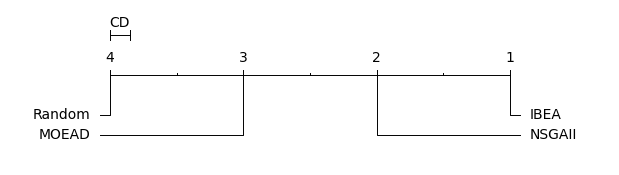

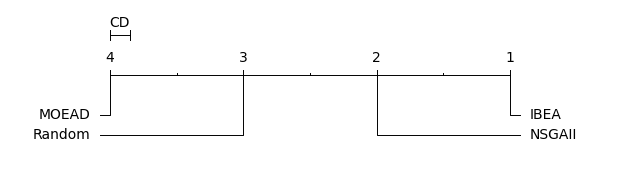

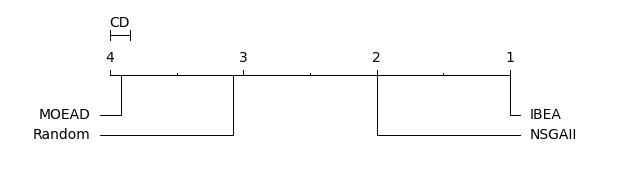

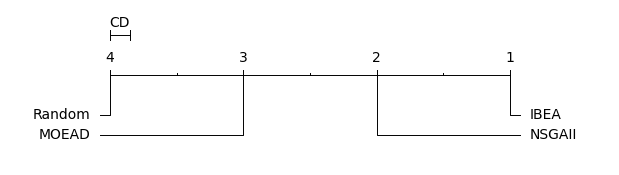

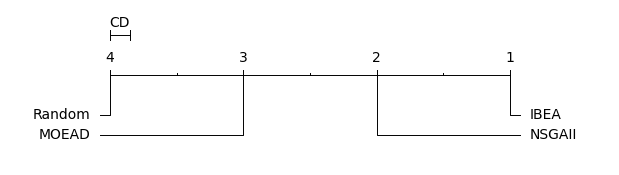

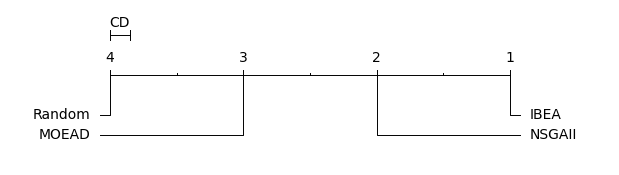

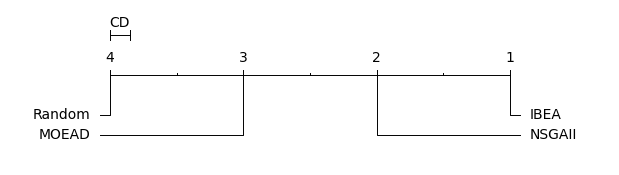

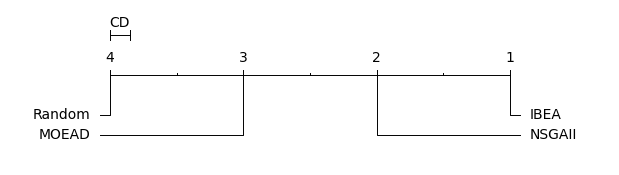

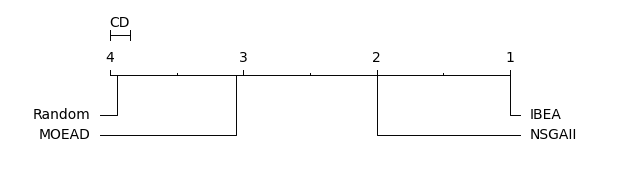

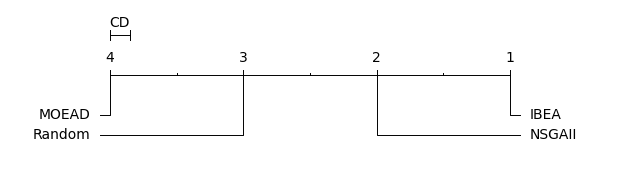

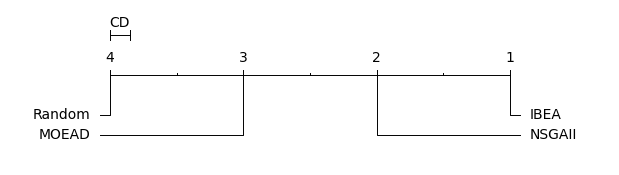

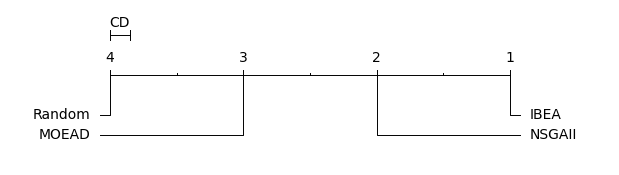

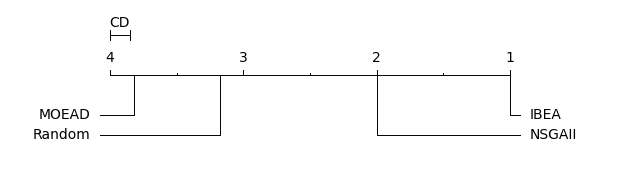

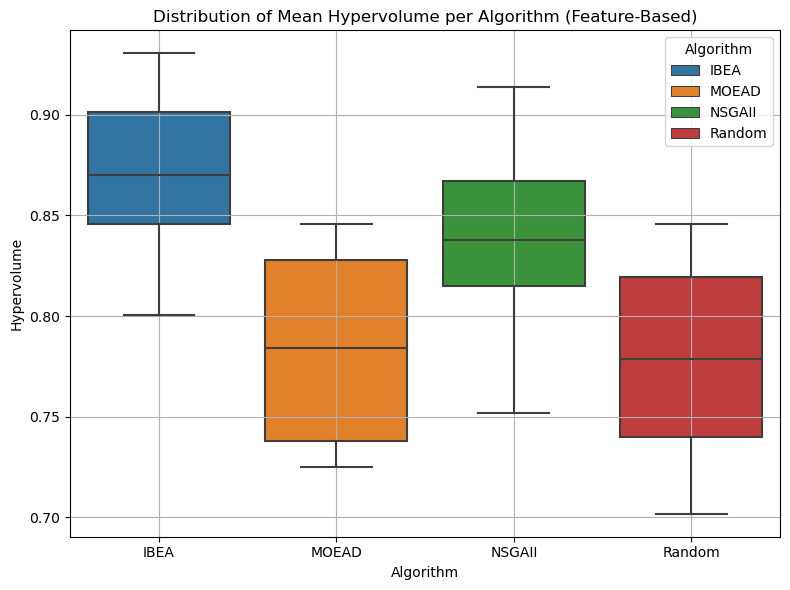

In [1]:
# Re-import necessary packages due to kernel reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from collections import defaultdict
from autorank import autorank, create_report, plot_stats


# Load the CSV file again
csv_path = "C:\\Users\\aditi\\Downloads\\dbmopp_dataset_perf.csv"
df = pd.read_csv(csv_path, sep='\s+')

# Features and budgets
features = ['n_var', 'n_obj', 'nonident_ps', 'var_density', 'n_discon_ps', 'n_local_fronts', 'n_resist_regions']

n_iterations = 1000
noise_std = 1e-4

# Store results
all_feature_results = []
mean_perf = []

# Feature-based analysis
for feature in features:
    median_val = df[feature].median()
    df['feature_group'] = np.where(df[feature] <= median_val, f'Low {feature}', f'High {feature}')

    for group_name, group_df in df.groupby('feature_group'):
        if len(group_df) < 10:
            continue

        algo_rank_counts = defaultdict(lambda: [0] * 4)
        local_mean_perf = []

        for _ in range(n_iterations):
            sample = resample(group_df, replace=True, n_samples=len(group_df))
            sample = sample.copy()
            sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
            mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
            local_mean_perf.append(mean_scores)
            ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
            for i, row in ranked.iterrows():
                algo_rank_counts[row['algo']][i] += 1

        mean_perf.extend(local_mean_perf)

        algorithms = sorted(algo_rank_counts.keys())
        result = {
            'Feature': [feature] * len(algorithms),
            'Group': [group_name] * len(algorithms),
            'Algorithm': algorithms
        }
        for rank in range(4):
            result[f'Rank {rank+1} Frequency'] = [
                algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
            ]

        all_feature_results.append(pd.DataFrame(result))

        # AutoRank statistical ranking
        algo_scores_matrix = defaultdict(list)
        for df_iter in local_mean_perf:
            for _, row in df_iter.iterrows():
                algo_scores_matrix[row['algo']].append(row['hypervolume'])

        autorank_df = pd.DataFrame(algo_scores_matrix)

        try:
            result_stats = autorank(autorank_df, alpha=0.05, verbose=False)
            print(f"\nAutoRank Summary for Feature = {feature}, Group = {group_name}")
            print(create_report(result_stats))
            plot_stats(result_stats)
        except Exception as e:
            print(f"AutoRank failed for Feature = {feature}, Group = {group_name}: {e}")

# Combine results
final_df = pd.concat(all_feature_results, ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Boxplot of mean performances
perf_df = pd.concat(mean_perf)
plt.figure(figsize=(8, 6))
sns.boxplot(x='algo', y='hypervolume', hue='algo', data=perf_df, dodge=False)
plt.title("Distribution of Mean Hypervolume per Algorithm (Feature-Based)")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
plt.legend(title="Algorithm", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()




## Benchmarking based on combination feature manually, using Bootstrap resampling and Auto rank. 

        meanrank    median       mad  ci_lower  ci_upper effect_size  \
Random       4.0  0.799481  0.000914  0.799295  0.799655         0.0   
MOEAD        3.0  0.807897  0.000923  0.807712  0.808093   -6.180978   
NSGAII       2.0  0.827901  0.000869  0.827712  0.828078  -21.503632   
IBEA         1.0  0.872058  0.000866  0.871857  0.872266  -55.010498   

         magnitude effect_size_above magnitude_above  
Random  negligible               0.0      negligible  
MOEAD        large         -6.180978           large  
NSGAII       large        -15.051979           large  
IBEA         large        -34.345661           large  

AutoRank Summary for Combo Feature = n_obj + n_resist_regions, Group = High Combo
The statistical analysis was conducted for 4 populations with 1000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the population MOEAD (p=0.000). Therefore, we assume that not all po

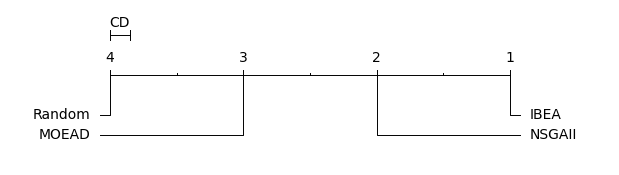

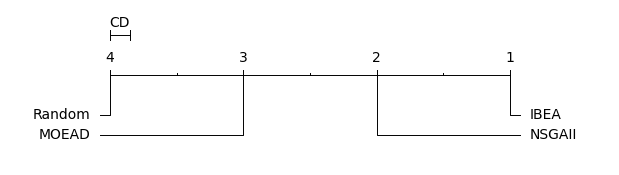

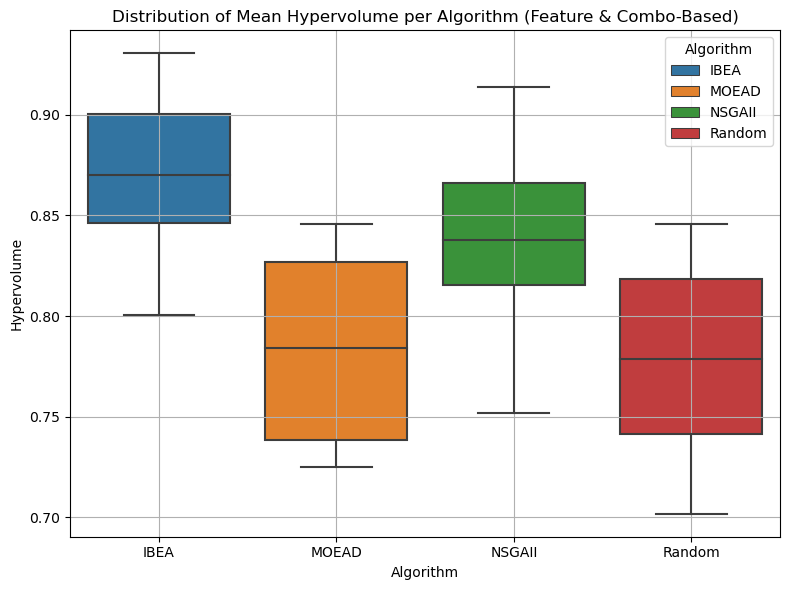

In [2]:
# --- Feature Combination Example (n_obj + n_resist_regions) ---
combo_name = "n_obj + n_resist_regions"
df['combo_group'] = np.where(
    (df['n_obj'] > df['n_obj'].median()) & (df['n_resist_regions'] > df['n_resist_regions'].median()),
    'High Combo', 'Low Combo'
)

combo_results = []
combo_mean_perf = []

for group_name, group_df in df.groupby('combo_group'):
    if len(group_df) < 10:
        continue

    algo_rank_counts = defaultdict(lambda: [0] * 4)
    local_mean_perf = []

    for _ in range(n_iterations):
        sample = resample(group_df, replace=True, n_samples=len(group_df))
        sample = sample.copy()
        sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
        mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
        local_mean_perf.append(mean_scores)
        ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
        for i, row in ranked.iterrows():
            algo_rank_counts[row['algo']][i] += 1

    combo_mean_perf.extend(local_mean_perf)

    algorithms = sorted(algo_rank_counts.keys())
    result = {
        'Feature': [combo_name] * len(algorithms),
        'Group': [group_name] * len(algorithms),
        'Algorithm': algorithms
    }
    for rank in range(4):
        result[f'Rank {rank+1} Frequency'] = [
            algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
        ]

    combo_results.append(pd.DataFrame(result))

    # AutoRank for combination
    algo_scores_matrix = defaultdict(list)
    for df_iter in local_mean_perf:
        for _, row in df_iter.iterrows():
            algo_scores_matrix[row['algo']].append(row['hypervolume'])

    autorank_df = pd.DataFrame(algo_scores_matrix)

    try:
        result_stats = autorank(autorank_df, alpha=0.05, verbose=False)
        print(f"\nAutoRank Summary for Combo Feature = {combo_name}, Group = {group_name}")
        print(create_report(result_stats))
        plot_stats(result_stats)
    except Exception as e:
        print(f"AutoRank failed for Combo Feature = {combo_name}, Group = {group_name}: {e}")

# Final results
combo_df = pd.concat(combo_results, ignore_index=True)
final_df = pd.concat(all_feature_results + [combo_df], ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Performance boxplot
perf_df = pd.concat(mean_perf + combo_mean_perf)
plt.figure(figsize=(8, 6))
sns.boxplot(x='algo', y='hypervolume', hue='algo', data=perf_df, dodge=False)
plt.title("Distribution of Mean Hypervolume per Algorithm (Feature & Combo-Based)")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
plt.legend(title="Algorithm", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

        meanrank    median       mad  ci_lower  ci_upper effect_size  \
Random       4.0  0.778695  0.000488  0.778604  0.778794         0.0   
MOEAD        3.0  0.783919  0.000473  0.783812  0.783998   -7.334654   
NSGAII       2.0  0.837944  0.000467   0.83784  0.838021  -83.631677   
IBEA         1.0  0.870075  0.000385  0.870009   0.87017 -140.163933   

         magnitude effect_size_above magnitude_above  
Random  negligible               0.0      negligible  
MOEAD        large         -7.334654           large  
NSGAII       large        -77.535487           large  
IBEA         large        -50.607348           large  

AutoRank Summary for Combo Feature = n_var + var_density, Group = Low Combo
The statistical analysis was conducted for 4 populations with 1000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the population Random (p=0.002). Therefore, we assume that not all populat

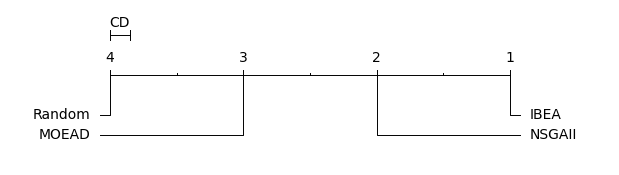

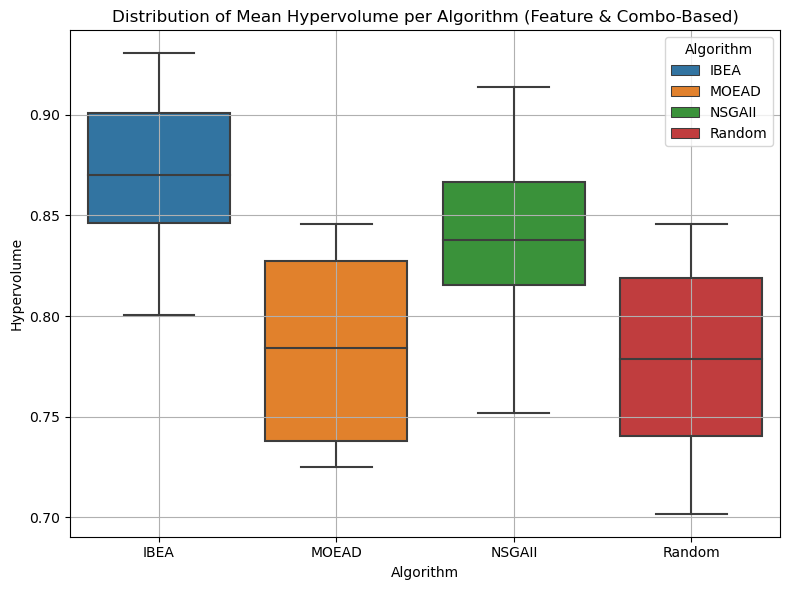

In [6]:
# --- Feature Combination Example (n_var + var_density) ---
combo_name = "n_var + var_density"
df['combo_group'] = np.where(
    (df['n_obj'] > df['n_obj'].median()) & (df['var_density'] > df['var_density'].median()),
    'High Combo', 'Low Combo'
)

combo_results = []
combo_mean_perf = []

for group_name, group_df in df.groupby('combo_group'):
    if len(group_df) < 10:
        continue

    algo_rank_counts = defaultdict(lambda: [0] * 4)
    local_mean_perf = []

    for _ in range(n_iterations):
        sample = resample(group_df, replace=True, n_samples=len(group_df))
        sample = sample.copy()
        sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
        mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
        local_mean_perf.append(mean_scores)
        ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
        for i, row in ranked.iterrows():
            algo_rank_counts[row['algo']][i] += 1

    combo_mean_perf.extend(local_mean_perf)

    algorithms = sorted(algo_rank_counts.keys())
    result = {
        'Feature': [combo_name] * len(algorithms),
        'Group': [group_name] * len(algorithms),
        'Algorithm': algorithms
    }
    for rank in range(4):
        result[f'Rank {rank+1} Frequency'] = [
            algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
        ]

    combo_results.append(pd.DataFrame(result))

    # AutoRank for combination
    algo_scores_matrix = defaultdict(list)
    for df_iter in local_mean_perf:
        for _, row in df_iter.iterrows():
            algo_scores_matrix[row['algo']].append(row['hypervolume'])

    autorank_df = pd.DataFrame(algo_scores_matrix)

    try:
        result_stats = autorank(autorank_df, alpha=0.05, verbose=False)
        print(f"\nAutoRank Summary for Combo Feature = {combo_name}, Group = {group_name}")
        print(create_report(result_stats))
        plot_stats(result_stats)
    except Exception as e:
        print(f"AutoRank failed for Combo Feature = {combo_name}, Group = {group_name}: {e}")

# Final results
combo_df = pd.concat(combo_results, ignore_index=True)
final_df = pd.concat(all_feature_results + [combo_df], ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Performance boxplot
perf_df = pd.concat(mean_perf + combo_mean_perf)
plt.figure(figsize=(8, 6))
sns.boxplot(x='algo', y='hypervolume', hue='algo', data=perf_df, dodge=False)
plt.title("Distribution of Mean Hypervolume per Algorithm (Feature & Combo-Based)")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
plt.legend(title="Algorithm", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

        meanrank      mean       std  ci_lower  ci_upper effect_size  \
MOEAD      3.917  0.767489  0.001590  0.767363  0.767615         0.0   
Random     3.083  0.770301  0.001440  0.770188  0.770415   -1.854479   
NSGAII     2.000  0.810447  0.001482   0.81033  0.810565   -27.95098   
IBEA       1.000  0.842974  0.001378  0.842865  0.843083  -50.742462   

         magnitude effect_size_above magnitude_above  
MOEAD   negligible               0.0      negligible  
Random       large         -1.854479           large  
NSGAII       large         -27.47567           large  
IBEA         large        -22.727297           large  

AutoRank Summary for Combo Feature = n_local_fronts + n_discon_ps, Group = High Combo
The statistical analysis was conducted for 4 populations with 1000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.590). Theref

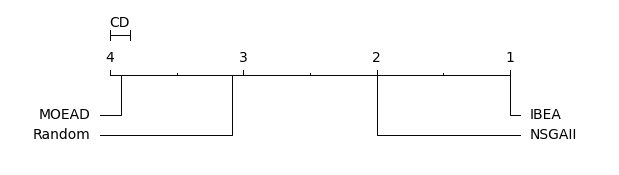

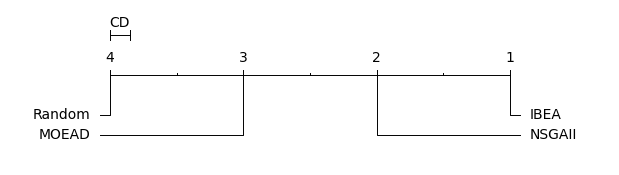

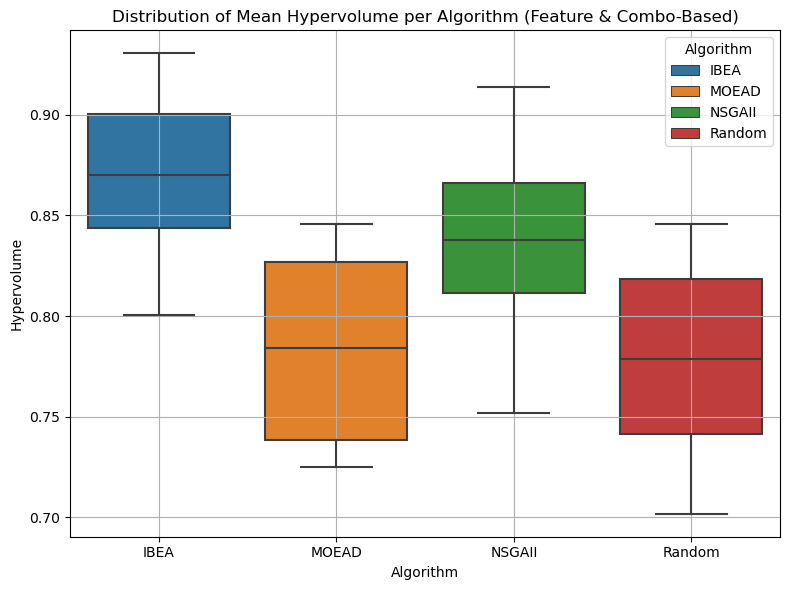

In [3]:
# --- Feature Combination Example n_local_fronts + n_discon_ps) ---
combo_name = "n_local_fronts + n_discon_ps"
df['combo_group'] = np.where(
    (df['n_obj'] > df['n_obj'].median()) & (df['n_discon_ps'] > df['n_discon_ps'].median()),
    'High Combo', 'Low Combo'
)

combo_results = []
combo_mean_perf = []

for group_name, group_df in df.groupby('combo_group'):
    if len(group_df) < 10:
        continue

    algo_rank_counts = defaultdict(lambda: [0] * 4)
    local_mean_perf = []

    for _ in range(n_iterations):
        sample = resample(group_df, replace=True, n_samples=len(group_df))
        sample = sample.copy()
        sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
        mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
        local_mean_perf.append(mean_scores)
        ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
        for i, row in ranked.iterrows():
            algo_rank_counts[row['algo']][i] += 1

    combo_mean_perf.extend(local_mean_perf)

    algorithms = sorted(algo_rank_counts.keys())
    result = {
        'Feature': [combo_name] * len(algorithms),
        'Group': [group_name] * len(algorithms),
        'Algorithm': algorithms
    }
    for rank in range(4):
        result[f'Rank {rank+1} Frequency'] = [
            algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
        ]

    combo_results.append(pd.DataFrame(result))

    # AutoRank for combination
    algo_scores_matrix = defaultdict(list)
    for df_iter in local_mean_perf:
        for _, row in df_iter.iterrows():
            algo_scores_matrix[row['algo']].append(row['hypervolume'])

    autorank_df = pd.DataFrame(algo_scores_matrix)

    try:
        result_stats = autorank(autorank_df, alpha=0.05, verbose=False)
        print(f"\nAutoRank Summary for Combo Feature = {combo_name}, Group = {group_name}")
        print(create_report(result_stats))
        plot_stats(result_stats)
    except Exception as e:
        print(f"AutoRank failed for Combo Feature = {combo_name}, Group = {group_name}: {e}")

# Final results
combo_df = pd.concat(combo_results, ignore_index=True)
final_df = pd.concat(all_feature_results + [combo_df], ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Performance boxplot
perf_df = pd.concat(mean_perf + combo_mean_perf)
plt.figure(figsize=(8, 6))
sns.boxplot(x='algo', y='hypervolume', hue='algo', data=perf_df, dodge=False)
plt.title("Distribution of Mean Hypervolume per Algorithm (Feature & Combo-Based)")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
plt.legend(title="Algorithm", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

        meanrank      mean       std  ci_lower  ci_upper effect_size  \
MOEAD        4.0  0.679368  0.001750  0.679229  0.679506         0.0   
Random       3.0  0.706005  0.001604  0.705878  0.706132  -15.865264   
NSGAII       2.0  0.761911  0.001695  0.761777  0.762045  -47.910347   
IBEA         1.0  0.804586  0.001559  0.804462  0.804709  -75.548057   

         magnitude effect_size_above magnitude_above  
MOEAD   negligible               0.0      negligible  
Random       large        -15.865264           large  
NSGAII       large        -33.875568           large  
IBEA         large        -26.204917           large  

AutoRank Summary for Combo Feature = n_obj  + n_local_fronts, Group = High Combo
The statistical analysis was conducted for 4 populations with 1000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.124). Therefore, 

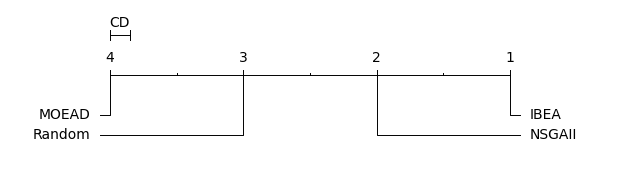

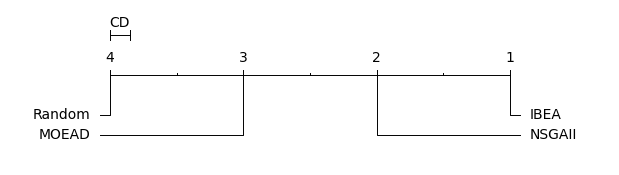

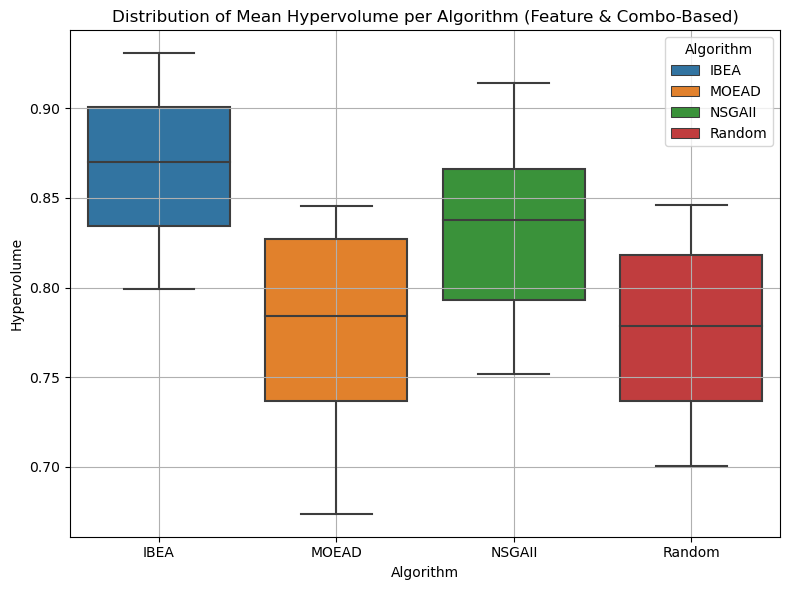

In [5]:
# --- Feature Combination Example (n_obj + n_local_fronts) ---
combo_name = "n_obj  + n_local_fronts"
df['combo_group'] = np.where(
    (df['n_obj'] > df['n_obj'].median()) & (df['n_local_fronts'] > df['n_local_fronts'].median()),
    'High Combo', 'Low Combo'
)

combo_results = []
combo_mean_perf = []

for group_name, group_df in df.groupby('combo_group'):
    if len(group_df) < 10:
        continue

    algo_rank_counts = defaultdict(lambda: [0] * 4)
    local_mean_perf = []

    for _ in range(n_iterations):
        sample = resample(group_df, replace=True, n_samples=len(group_df))
        sample = sample.copy()
        sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
        mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
        local_mean_perf.append(mean_scores)
        ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
        for i, row in ranked.iterrows():
            algo_rank_counts[row['algo']][i] += 1

    combo_mean_perf.extend(local_mean_perf)

    algorithms = sorted(algo_rank_counts.keys())
    result = {
        'Feature': [combo_name] * len(algorithms),
        'Group': [group_name] * len(algorithms),
        'Algorithm': algorithms
    }
    for rank in range(4):
        result[f'Rank {rank+1} Frequency'] = [
            algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
        ]

    combo_results.append(pd.DataFrame(result))

    # AutoRank for combination
    algo_scores_matrix = defaultdict(list)
    for df_iter in local_mean_perf:
        for _, row in df_iter.iterrows():
            algo_scores_matrix[row['algo']].append(row['hypervolume'])

    autorank_df = pd.DataFrame(algo_scores_matrix)

    try:
        result_stats = autorank(autorank_df, alpha=0.05, verbose=False)
        print(f"\nAutoRank Summary for Combo Feature = {combo_name}, Group = {group_name}")
        print(create_report(result_stats))
        plot_stats(result_stats)
    except Exception as e:
        print(f"AutoRank failed for Combo Feature = {combo_name}, Group = {group_name}: {e}")

# Final results
combo_df = pd.concat(combo_results, ignore_index=True)
final_df = pd.concat(all_feature_results + [combo_df], ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Performance boxplot
perf_df = pd.concat(mean_perf + combo_mean_perf)
plt.figure(figsize=(8, 6))
sns.boxplot(x='algo', y='hypervolume', hue='algo', data=perf_df, dodge=False)
plt.title("Distribution of Mean Hypervolume per Algorithm (Feature & Combo-Based)")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
plt.legend(title="Algorithm", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

        meanrank      mean       std  ci_lower  ci_upper effect_size  \
MOEAD      3.891  0.767570  0.001553  0.767447  0.767693         0.0   
Random     3.109  0.770189  0.001423  0.770076  0.770301   -1.758118   
NSGAII     2.000  0.810451  0.001463  0.810335  0.810567  -28.424254   
IBEA       1.000  0.843046  0.001329   0.84294  0.843151  -52.214357   

         magnitude effect_size_above magnitude_above  
MOEAD   negligible               0.0      negligible  
Random       large         -1.758118           large  
NSGAII       large        -27.902561           large  
IBEA         large        -23.320077           large  

AutoRank Summary for Combo Feature = n_obj   + n_var + n_discon_ps, Group = High Combo
The statistical analysis was conducted for 4 populations with 1000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.378). There

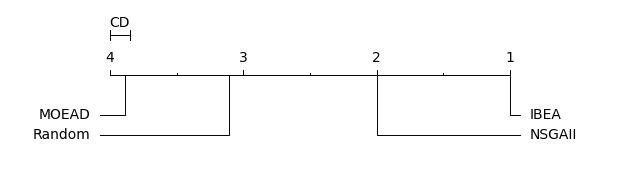

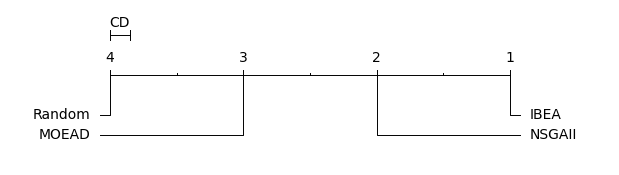

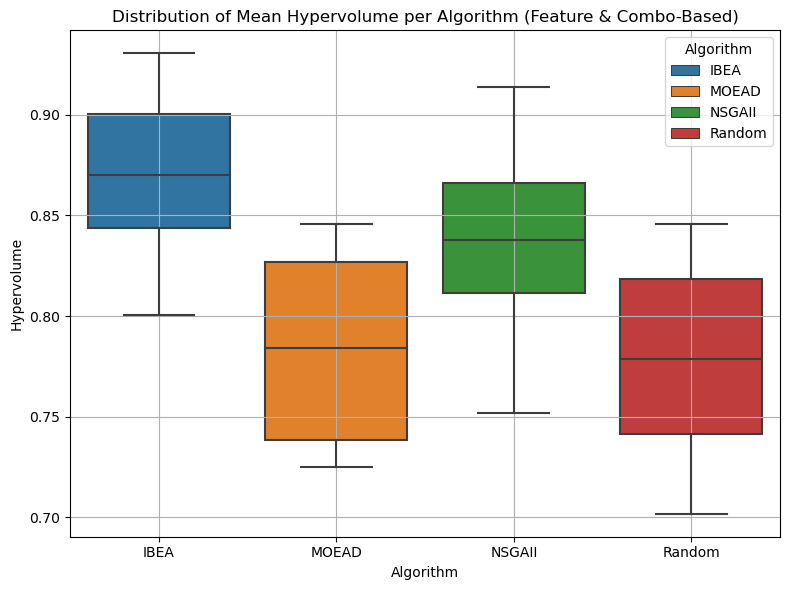

In [4]:
# --- Feature Combination Example (n_obj + n_resist_regions) ---
combo_name = "n_obj   + n_var + n_discon_ps"
df['combo_group'] = np.where(
    (df['n_obj'] > df['n_obj'].median()) & (df['n_discon_ps'] > df['n_discon_ps'].median()) & (df['n_discon_ps'] > df['n_discon_ps'].median()),
    'High Combo', 'Low Combo'
)

combo_results = []
combo_mean_perf = []

for group_name, group_df in df.groupby('combo_group'):
    if len(group_df) < 10:
        continue

    algo_rank_counts = defaultdict(lambda: [0] * 4)
    local_mean_perf = []

    for _ in range(n_iterations):
        sample = resample(group_df, replace=True, n_samples=len(group_df))
        sample = sample.copy()
        sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
        mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
        local_mean_perf.append(mean_scores)
        ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
        for i, row in ranked.iterrows():
            algo_rank_counts[row['algo']][i] += 1

    combo_mean_perf.extend(local_mean_perf)

    algorithms = sorted(algo_rank_counts.keys())
    result = {
        'Feature': [combo_name] * len(algorithms),
        'Group': [group_name] * len(algorithms),
        'Algorithm': algorithms
    }
    for rank in range(4):
        result[f'Rank {rank+1} Frequency'] = [
            algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
        ]

    combo_results.append(pd.DataFrame(result))

    # AutoRank for combination
    algo_scores_matrix = defaultdict(list)
    for df_iter in local_mean_perf:
        for _, row in df_iter.iterrows():
            algo_scores_matrix[row['algo']].append(row['hypervolume'])

    autorank_df = pd.DataFrame(algo_scores_matrix)

    try:
        result_stats = autorank(autorank_df, alpha=0.05, verbose=False)
        print(f"\nAutoRank Summary for Combo Feature = {combo_name}, Group = {group_name}")
        print(create_report(result_stats))
        plot_stats(result_stats)
    except Exception as e:
        print(f"AutoRank failed for Combo Feature = {combo_name}, Group = {group_name}: {e}")

# Final results
combo_df = pd.concat(combo_results, ignore_index=True)
final_df = pd.concat(all_feature_results + [combo_df], ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Performance boxplot
perf_df = pd.concat(mean_perf + combo_mean_perf)
plt.figure(figsize=(8, 6))
sns.boxplot(x='algo', y='hypervolume', hue='algo', data=perf_df, dodge=False)
plt.title("Distribution of Mean Hypervolume per Algorithm (Feature & Combo-Based)")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
plt.legend(title="Algorithm", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- Feature Combination Example (n_obj + n_resist_regions) ---
combo_name = "n_obj + n_resist_regions"
df['combo_group'] = np.where(
    (df['n_obj'] > df['n_obj'].median()) & (df['n_resist_regions'] > df['n_resist_regions'].median()),
    'High Combo', 'Low Combo'
)

combo_results = []
combo_mean_perf = []

for group_name, group_df in df.groupby('combo_group'):
    if len(group_df) < 10:
        continue

    algo_rank_counts = defaultdict(lambda: [0] * 4)
    local_mean_perf = []

    for _ in range(n_iterations):
        sample = resample(group_df, replace=True, n_samples=len(group_df))
        sample = sample.copy()
        sample['hypervolume'] += np.random.normal(0, noise_std, size=len(sample))
        mean_scores = sample.groupby('algo')['hypervolume'].mean().reset_index()
        local_mean_perf.append(mean_scores)
        ranked = mean_scores.sort_values(by='hypervolume', ascending=False).reset_index(drop=True)
        for i, row in ranked.iterrows():
            algo_rank_counts[row['algo']][i] += 1

    combo_mean_perf.extend(local_mean_perf)

    algorithms = sorted(algo_rank_counts.keys())
    result = {
        'Feature': [combo_name] * len(algorithms),
        'Group': [group_name] * len(algorithms),
        'Algorithm': algorithms
    }
    for rank in range(4):
        result[f'Rank {rank+1} Frequency'] = [
            algo_rank_counts[algo][rank] / n_iterations for algo in algorithms
        ]

    combo_results.append(pd.DataFrame(result))

    # AutoRank for combination
    algo_scores_matrix = defaultdict(list)
    for df_iter in local_mean_perf:
        for _, row in df_iter.iterrows():
            algo_scores_matrix[row['algo']].append(row['hypervolume'])

    autorank_df = pd.DataFrame(algo_scores_matrix)

    try:
        result_stats = autorank(autorank_df, alpha=0.05, verbose=False)
        print(f"\nAutoRank Summary for Combo Feature = {combo_name}, Group = {group_name}")
        print(create_report(result_stats))
        plot_stats(result_stats)
    except Exception as e:
        print(f"AutoRank failed for Combo Feature = {combo_name}, Group = {group_name}: {e}")

# Final results
combo_df = pd.concat(combo_results, ignore_index=True)
final_df = pd.concat(all_feature_results + [combo_df], ignore_index=True)
final_df.drop_duplicates(inplace=True)
final_df.reset_index(drop=True, inplace=True)

# Performance boxplot
perf_df = pd.concat(mean_perf + combo_mean_perf)
plt.figure(figsize=(8, 6))
sns.boxplot(x='algo', y='hypervolume', hue='algo', data=perf_df, dodge=False)
plt.title("Distribution of Mean Hypervolume per Algorithm (Feature & Combo-Based)")
plt.xlabel("Algorithm")
plt.ylabel("Hypervolume")
plt.legend(title="Algorithm", loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()